### Plotting for Inferances

In [51]:
# ! pip3 install statsmodels

In [52]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import *

from statsmodels.tsa.stattools import acf

In [53]:
def jacknife(A,func):
    c0=func(A)
    sig=0
    for i in range(len(A)):
        temp=A.pop(0)
        c=func(A)
        sig+=(c-c0)**2
        A.append(temp)
    return c0,sqrt(sig)

## Analysis of Data

In [54]:
a=np.array([1,2,3.0,4.0])
b=np.array([1,2,3.0,4.0])

In [55]:
def variance(X):
    return var(X)
def Average(X):
    return average(X)

def AverageWithErr(X,X_ERR):
    weigth=(1/X_ERR)**2
    
    return np.sum(X*weigth)/np.sum(weigth),1.0/np.sum(weigth)

def analyze(temparature,L,E,M):
    en,en_err=jacknife(E,Average)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err],[en,en_err]

def leniar_fn(x,a,b):
    return a*x+b

def quadratic_fn(x,a,b,c):
    return a*x*x+b*x+c

### Final Analysis

In [56]:
def getObservables(xVec):
    N=len(xVec)
    x1=sum(xVec)/N
    x2=sum(xVec**2)/N
    x3=sum(xVec**3)/N
    x4=sum(xVec**4)/N
    xtemp=np.append(xVec,xVec)
    xCorr=[]
    for i in range(N):
        xCorr.append(sum(xVec*xtemp[i:i+N]))
    return x1,x2,x3,x4,np.array(xCorr)/N

def getObservables2(xVec,x0Vec):
    N=len(xVec)
    x1=sum(xVec)/N
    x2=(xVec-x0Vec)**2
    x3=(xVec-x0Vec)**3
    x4=(xVec-x0Vec)**4
    xtemp=np.append(xVec-x0Vec,xVec-x0Vec)
    xCorr=[]
    for i in range(N):
        xCorr.append(sum(xVec*xtemp[i:i+N]))
    return x1,x2,x3,x4,np.array(xCorr)/N

In [57]:
fname="N1200_Nm_120.txt"
f= open(fname,"r")
l=f.readline()
data={'idx':[],'s':[]}
obsVervables={'xvec':[],'x1':[],'x2':[],'x3':[],'x4':[],'twoPointCorrs':[]}

scale=0.1

counter=0
count=0
pCount=100

while l:
    if '#N'in l:
        print(l)
        items=l[:-1].split(":")
        N=int(items[1])
        break
    l=f.readline()
print( " time steps = ",N)
simRun={'data':data,'obs':obsVervables,'N':N}

f.seek(0)
l=f.readline()

while l:
    if '#'==l[0]:
        l=f.readline()
        continue
    if len(l)<3 :
        l=f.readline()
        continue
    if count == pCount:
        print(counter,end=",")
        count=0
    count+=1
    counter+=1
    if counter<500:
        l=f.readline()
        continue
    
    #     print(items)
    items=l[:-1].split(",")
    data['idx'].append(float(items[0]))
    data['s'].append(float(items[1]))
    xVec=[]
    for i in range(2,N+2):
        xVec.append(float(items[i]))
    xVec=np.array(xVec)
    x,x2,x3,x4,cor=getObservables(xVec)
    obsVervables['xvec'].append(xVec)
    obsVervables['x1'].append(x)
    obsVervables['x2'].append(x2)
    obsVervables['x3'].append(x3)
    obsVervables['x4'].append(x4)
    obsVervables['twoPointCorrs'].append(cor)
    l=f.readline()
data['idx']=np.array(data['idx'])
data['s']=np.array(data['s'])    
obsVervables['xvec']=np.array(obsVervables['xvec'])
obsVervables['x1']=np.array(obsVervables['x1'])
obsVervables['x2']=np.array(obsVervables['x2'])
obsVervables['x3']=np.array(obsVervables['x3'])
obsVervables['x4']=np.array(obsVervables['x4'])
obsVervables['twoPointCorrs']=np.array(obsVervables['twoPointCorrs'])
simRun.update({'eventCount':len(data['idx'])})
print()
print("number of events inside  = ",simRun['data']['idx'].shape)
print("number of timesteps  = ",simRun['obs']['twoPointCorrs'].shape[1])
f.close()

#N : 1200

 time steps =  1200
100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,3100,3200,3300,3400,3500,3600,3700,3800,3900,4000,4100,4200,4300,4400,4500,4600,4700,4800,4900,5000,5100,5200,5300,5400,5500,5600,5700,5800,5900,6000,6100,6200,6300,6400,6500,6600,6700,6800,6900,7000,7100,7200,7300,7400,7500,7600,7700,7800,7900,8000,8100,8200,8300,8400,8500,8600,8700,8800,8900,9000,9100,9200,9300,9400,9500,9600,9700,9800,9900,
number of events inside  =  (9501,)
number of timesteps  =  1200


In [58]:
simRun['obs']['x4'].shape

(9501,)

#### Validation Plots

0,

/home/sid/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'x2')

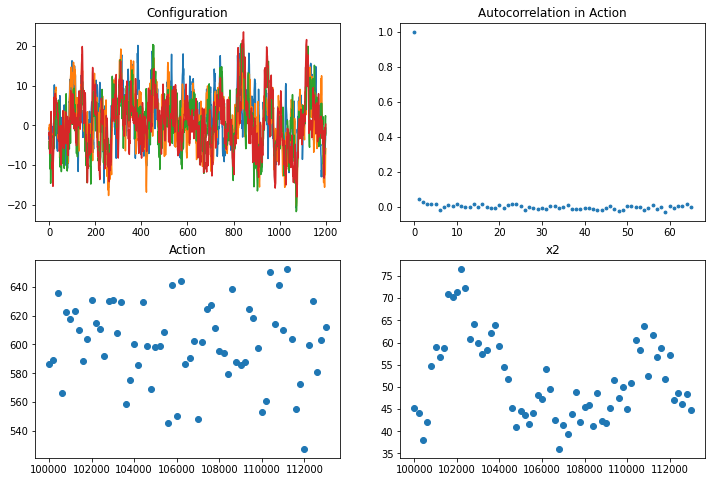

In [59]:
M=[100,101,102,103]
f= open(fname,"r")
l=f.readline()

a,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,8))
counter=0

while l:
    if '#'==l[0]:
        l=f.readline()
        continue
    if len(l)<3 :
        l=f.readline()
        continue
    if count == pCount:
        print(counter,end=",")
        count=0
    if counter in M:
        items=l[:-1].split(",")
        N=len(items)
        xVec=[]
        for i in range(2,N):
            xVec.append(float(items[i]))
        ax[0][0].plot(np.arange(N-2),xVec)
#         plt.scatter(np.arange(N-2),xVec,s=2)
    counter+=1
    l=f.readline()
ax[0][0].set_title("Configuration")

f.close()

var=simRun['data']['s']
corr=acf(var,nlags=int(len(var)/2))
N=len(corr)
N=66
ax[0][1].scatter(np.arange(N),corr[:N],s=8)
ax[0][1].set_title("Autocorrelation in Action")



ax[1][0].scatter(simRun['data']['idx'][:N],data['s'][:N])
ax[1][0].set_title("Action")
ax[1][1].scatter(simRun['data']['idx'][:N],simRun['obs']['x2'][:N])
ax[1][1].set_title("x2")


#### Jacknife

In [60]:
def jacknife2(A,func,binlen=1):
    c0=func(A)
    sig=0
    for i in range(int(len(A)/binlen)+1):
#         print("doing i= ",i,"/",)
        temp=[A.pop(0) for i in range(binlen)]
        c=func(A)
        sig+=(c-c0)**2
        for i in range(binlen):
            A.append(temp.pop())
    return c0,sqrt(sig)

### (Observables) on path

In [61]:
print()  
print("jacknifing x1")
BIN_LEN=int(simRun['eventCount']/1000 +1)
x1,x1_err=jacknife2([i for i in simRun['obs']['x1']],Average,BIN_LEN)
print(" <x1> = ",x1," +/- ",x1_err)

print()  
print("jacknifing x2")
BIN_LEN=int(simRun['eventCount']/1000 +1)
x2,x2_err=jacknife2([i for i in simRun['obs']['x2']],Average,BIN_LEN)
print(" <x2> = ",x2," +/- ",x2_err)

print()  
print("jacknifing x3")
BIN_LEN=int(simRun['eventCount']/1000 +1)
x3,x3_err=jacknife2([i for i in simRun['obs']['x3']],Average,BIN_LEN)
print(" <x3> = ",x3," +/- ",x3_err)

print()  
print("jacknifing x4")
BIN_LEN=int(simRun['eventCount']/1000 +1)
x4,x4_err=jacknife2([i for i in simRun['obs']['x4']],Average,BIN_LEN)
print(" <x4> = ",x4," +/- ",x4_err)


jacknifing x1
 <x1> =  0.012941426354134289  +/-  0.02529791037222515

jacknifing x2
 <x2> =  49.968657137051196  +/-  0.1389848367701698

jacknifing x3
 <x3> =  3.396265943666482  +/-  4.018899735792762

jacknifing x4
 <x4> =  7497.1959441764075  +/-  43.956611725564755



jacknifing Vect x1
BIN_LEN =  381   simRun['eventCount'] /  BIN_LEN  =  24.937007874015748
0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1080,1100,1120,1140,1160,1180,

<ErrorbarContainer object of 3 artists>

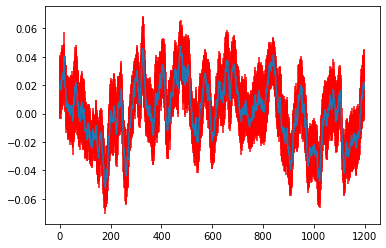

In [62]:
print()
print("jacknifing Vect x1")

BIN_LEN=int(simRun['eventCount']/25 +1)
print("BIN_LEN = ",BIN_LEN,"  simRun['eventCount'] /  BIN_LEN  = ",simRun['eventCount'] /  BIN_LEN)
x1_vec=[]
x1_vec_err=[]
for m in range(int(simRun['N'])):
    if(m%20==0):
        print(m,end=",")
    d=jacknife2([i for i in simRun['obs']['xvec'][:,m]],Average,BIN_LEN)
    x1_vec.append(d[0]*scale)
    x1_vec_err.append(d[1]*scale)
plt.errorbar([i for i in range(simRun['N'])],x1_vec,x1_vec_err,ecolor='r')

### Finding the flutuations

In [63]:
deltaXt=np.array([i-x1_vec for i in simRun['obs']['xvec']])
print(deltaXt.shape)

(9501, 1200)


In [64]:
deltaXt[:,m].shape

(9501,)

In [65]:
print()
print("jacknifing  x2 of fluctuations")

BIN_LEN=int(simRun['eventCount']/25 +1)
print("BIN_LEN = ",BIN_LEN,"  simRun['eventCount'] /  BIN_LEN  = ",simRun['eventCount'] /  BIN_LEN)
x2_vec=[]
x2_vec_err=[]
for m in range(int(simRun['N'])):
    if(m%20==0):
        print(m,end=",")
    d=jacknife2([i**2 for i in deltaXt[:,m]],Average,BIN_LEN)
    x2_vec.append(d[0]*scale**2)
    x2_vec_err.append(d[1]*scale**2)
    


jacknifing  x2 of fluctuations
BIN_LEN =  381   simRun['eventCount'] /  BIN_LEN  =  24.937007874015748
0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1080,1100,1120,1140,1160,1180,


<deltaX^2> =  0.49961135069229007


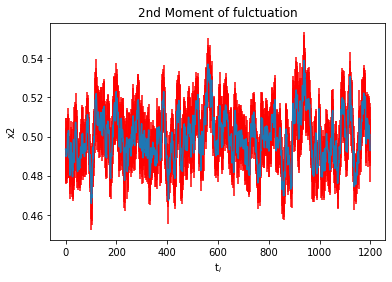

In [66]:
x2_vec=np.array(x2_vec)
x2_vec_err=np.array(x2_vec_err)
plt.errorbar([i for i in range(simRun['N'])],x2_vec,x2_vec_err,ecolor='r')
plt.title("2nd Moment of fulctuation")
plt.xlabel("t$_{i}$")
plt.ylabel("x2")

plt.savefig("x2.jpeg")

print()

_X2_AVG,_X2_ERR=AverageWithErr(x2_vec,x2_vec_err)
X2_AVG=Average(x2_vec)
# print(_X2_AVG," +/- ",_X2_ERR)
print("<deltaX^2> = ",Average(x2_vec))

In [67]:
print()
print("jacknifing Vect x3")

BIN_LEN=int(simRun['eventCount']/25 +1)
print("BIN_LEN = ",BIN_LEN,"  simRun['eventCount'] /  BIN_LEN  = ",simRun['eventCount'] /  BIN_LEN)
x3_vec=[]
x3_vec_err=[]
for m in range(int(simRun['N'])):
    if(m%20==0):
        print(m,end=",")
    d=jacknife2([i**3 for i in deltaXt[:,m]],Average,BIN_LEN)
    x3_vec.append(d[0]*scale**3)
    x3_vec_err.append(d[1]*scale**3)




jacknifing Vect x3
BIN_LEN =  381   simRun['eventCount'] /  BIN_LEN  =  24.937007874015748
0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1080,1100,1120,1140,1160,1180,


0.0027187380318617316  +/-  1.2976112778030163e-07
<deltaX^3> =  0.0032017904644671743


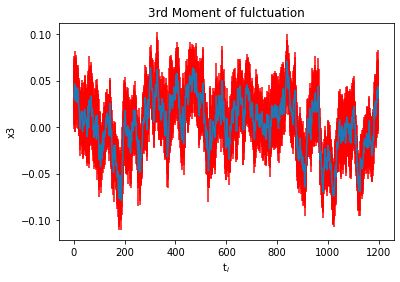

In [68]:
plt.errorbar([i for i in range(simRun['N'])],x3_vec,x3_vec_err,ecolor='r')
plt.title("3rd Moment of fulctuation")
plt.xlabel("t$_{i}$")
plt.ylabel("x3")

plt.savefig("x3.jpeg")
print()
x3_vec=np.array(x3_vec)
x3_vec_err=np.array(x3_vec_err)
_X3_AVG,_X3_ERR=AverageWithErr(x3_vec,x3_vec_err)
X3_AVG=Average(x3_vec)
print(_X3_AVG," +/- ",_X2_ERR)
print("<deltaX^3> = ",Average(x3_vec))

In [69]:
print()
print("jacknifing Vect x4")

BIN_LEN=int(simRun['eventCount']/25 +1)
print("BIN_LEN = ",BIN_LEN,"  simRun['eventCount'] /  BIN_LEN  = ",simRun['eventCount'] /  BIN_LEN)
x4_vec=[]
x4_vec_err=[]
for m in range(int(simRun['N'])):
    if(m%20==0):
        print(m,end=",")
    d=jacknife2([i**4 for i in deltaXt[:,m]],Average,BIN_LEN)
    x4_vec.append(d[0]*scale**4)
    x4_vec_err.append(d[1]*scale**4)
  


jacknifing Vect x4
BIN_LEN =  381   simRun['eventCount'] /  BIN_LEN  =  24.937007874015748
0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1080,1100,1120,1140,1160,1180,


0.7495025588569647


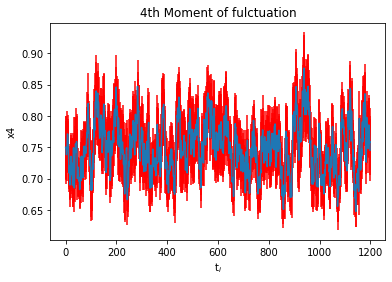

In [70]:
x4_vec=np.array(x4_vec)
x4_vec_err=np.array(x4_vec_err)
plt.errorbar([i for i in range(simRun['N'])],x4_vec,x4_vec_err,ecolor='r')
plt.title("4th Moment of fulctuation")
plt.xlabel("t$_{i}$")
plt.ylabel("x4")

plt.savefig("x4.jpeg")
print()
X4_AVG=Average(x4_vec)
print(X4_AVG)

In [71]:
print()
print("Making the corrVect")

corrDeltaX=[]
for j in range(simRun['eventCount']):
#     if j>2:
#         break
    xtemp=np.append(deltaXt[j],deltaXt[j])
    xCorr=[]
    if(j%500==0):
        print(j,end=",")
    N=len(deltaXt[j])
    for i in range(N):
        xCorr.append(sum(deltaXt[j]*xtemp[i:i+N])/N)
    corrDeltaX.append(np.array(xCorr))
corrDeltaX=np.array(corrDeltaX) 


Making the corrVect
0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,

In [72]:
BIN_LEN=int(simRun['eventCount']/25 +1)
x1x2=[]
x1x2_err=[]
print("BIN_LEN = ",BIN_LEN,"  simRun['eventCount'] /  BIN_LEN  = ",simRun['eventCount'] /  BIN_LEN)
for m in range(int(simRun['N']/2)):
    if(m%10==0):
        print(m,end=",")
    d=jacknife2([i for i in corrDeltaX[:,m]],Average,BIN_LEN)
    x1x2.append(d[0])
    x1x2_err.append(d[1])

BIN_LEN =  381   simRun['eventCount'] /  BIN_LEN  =  24.937007874015748
0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,

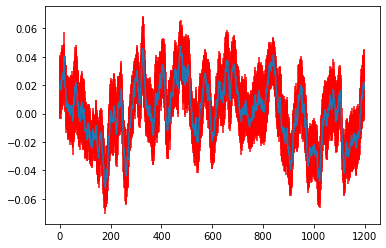

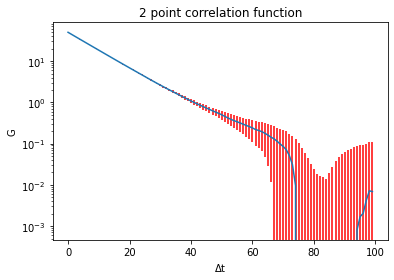

In [73]:
plt.yscale("linear")
plt.errorbar([i for i in range(len(x1_vec))],x1_vec,x1_vec_err,ecolor='r')
plt.figure()
n=int(len(x1x2)/2)
plt.yscale("log")
# plt.errorbar([i for i in range(n)],np.abs(x1x2[:n]),np.abs(x1x2_err[:n]),ecolor='r')
n=100
plt.errorbar([i for i in range(n)],x1x2[:n],x1x2_err[:n],ecolor='r')
plt.title("2 point correlation function")
plt.xlabel("$\Delta$t")
plt.ylabel("G")

plt.savefig("correlation.jpeg")

In [74]:
for i in range(1000):
    if x1x2[i]<0:
        print(i,x1x2[i])
        break

75 -0.015555826552499636


In [75]:
NCUT=65

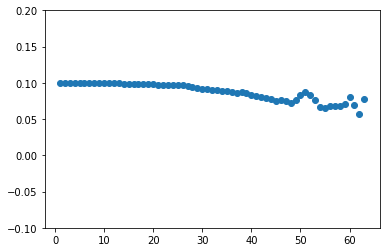

In [76]:
logG=np.log(x1x2[:NCUT])
effMass=[0.5*(logG[i-1] -logG[i+1]) for i in range(1,NCUT-1)]
effMass_err=[0.5*(abs(x1x2_err[i-1]/x1x2[i-1]) + abs(x1x2_err[i+1]/x1x2[i+1])) for i in range(1,NCUT-1)]
plt.scatter(np.arange(1,NCUT-1),effMass)
n=len(effMass)
# plt.errorbar([i for i in range(n)],effMass[:n],effMass_err[:n],ecolor='r')
plt.ylim([-0.1,0.2])
plt.savefig("effMass.jpeg")

In [77]:
m=0.1
w=0.1
N=1200

R=1+ w**2/2 - w * np.sqrt(1+0.25*w*w)
print("R = ",R)

x2 = (1+np.power(R,N)) /(2*m*w*np.sqrt(1+0.25*w**2))
print("x2 = ",x2 ,"and obtained ",X2_AVG)
print("x4 = ",3*x2*x2 ,"and obtained ",X4_AVG)

R =  0.9048750780274959
x2 =  49.93761694389222 and obtained  0.49961135069229007
x4 =  7481.296758104734 and obtained  0.7495025588569647
